In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

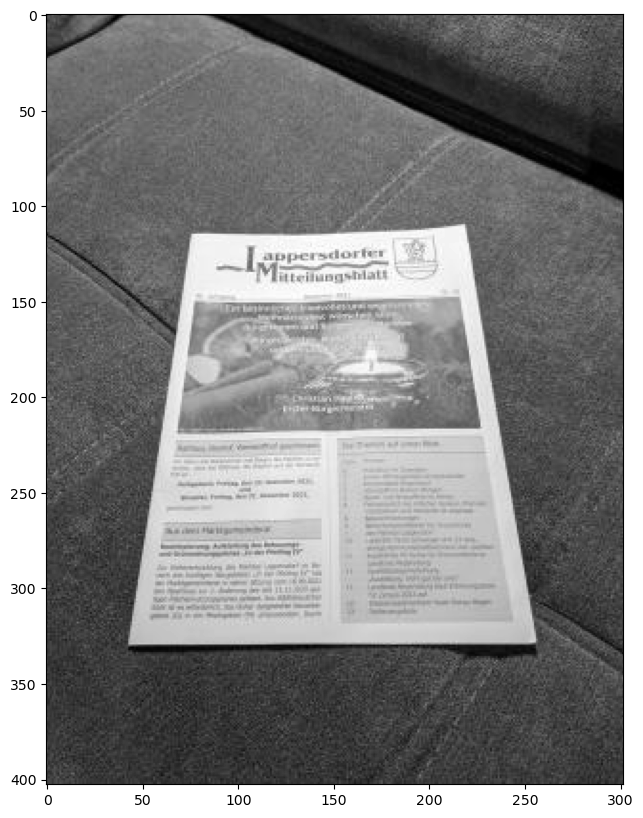

In [2]:
img = cv2.imread('document.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

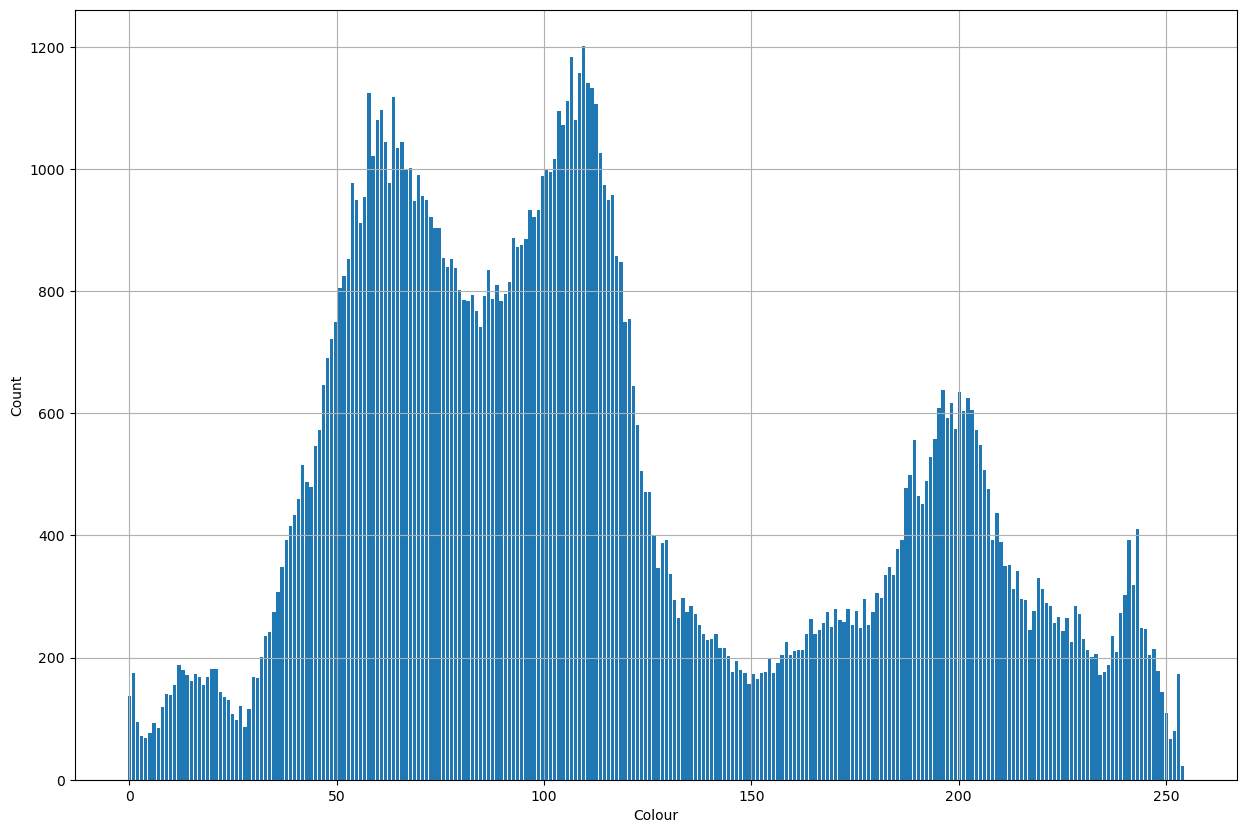

In [3]:
h = np.histogram(img, 256)
plt.bar(h[1][0:-1], h[0])
plt.xlabel('Colour'), plt.ylabel('Count')
plt.grid(True)


Otsu Thresholding

Let's now implement the Otsu thresholding algorithm. Remember that the algorithm consists of an optimization process that finds the thresholds that minimizes the intra-class variance or, equivalently, maximizes the inter-class variance.

In this homework, you are going to demonstrate the working principle of the Otsu algorithm. Therefore, you won't have to worry about an efficient implementation, we are going to use the brute force approach here.


In [7]:
print(img.shape)

(403, 302)


In [4]:
# Get image dimensions
rows, cols = img.shape
# Compute the total amount of image pixels
num_pixels = rows * cols


# Initializations
best_wcv = 1e6  # Best within-class variance (wcv)
opt_th = None   # Threshold corresponding to the best wcv

# Brute force search using all possible thresholds (levels of gray)
for th in range(1,255):

    foreground = []
    foreground = np.array(foreground)
    background = []
    background = np.array(background)
    for r in range (rows):
        for c in range (cols):
            if img[r,c] < th:
                foreground = np.append(foreground, img[r,c])
            else:
                background = np.append(background, img[r,c])


    omega_f = round(foreground.size/num_pixels, 2)
    omega_b = round(background.size/num_pixels, 2)

    sigma2_f = np.var(foreground)
    sigma2_b =np.var(background)

    wcv = (omega_f * sigma2_f) + (omega_b * sigma2_b)

    # Perform the optimization
    if wcv < best_wcv:
        best_wcv = wcv
        opt_th = th
        
# Print out the optimal threshold found by Otsu algorithm
print('Optimal threshold', opt_th)
 



Optimal threshold 141


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7fe31e7561f0>)

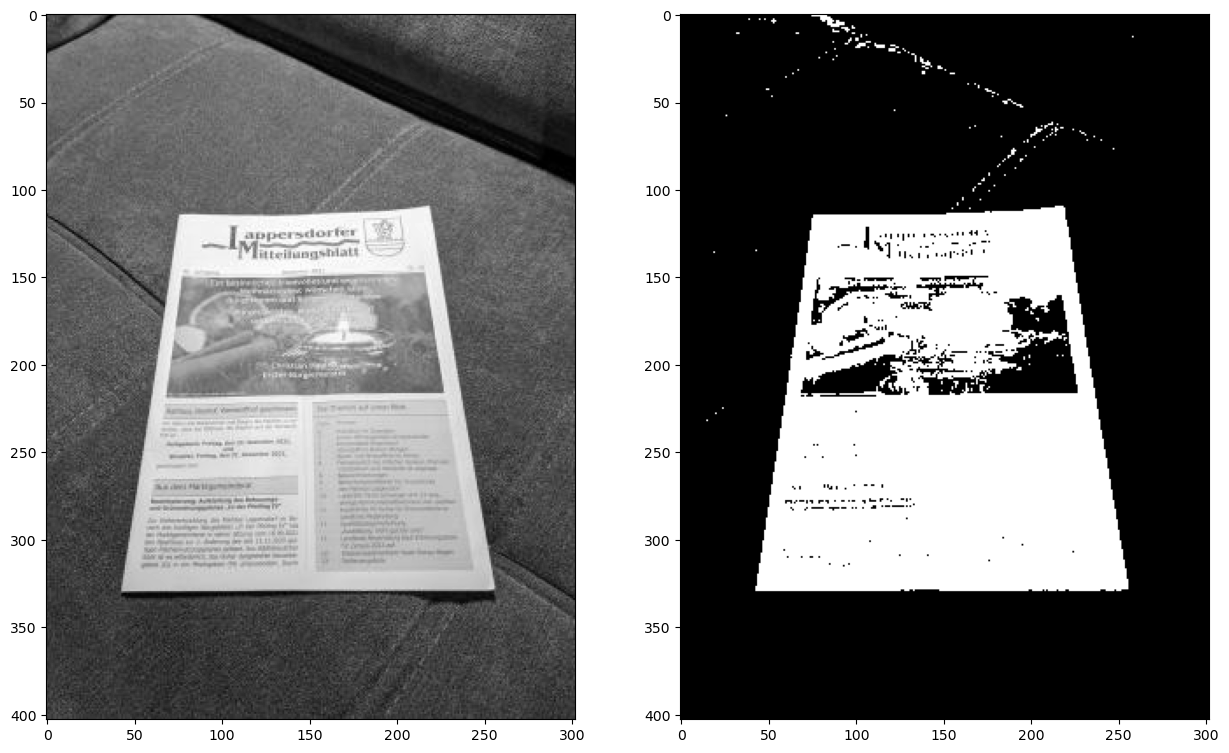

In [5]:
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.subplot(122), plt.imshow(img > opt_th, cmap='gray')

Answers.
1.Looking at the computed histogram, could it be considered bimodal?
Rather no as the histogram contains several peaks (at least 3), but for bimodal we need two.
    
2.Looking at the computed histogram, what binarization threshold would you chose? Why?
Near 150 as it divides the histogram into two parts if we considered two first peaks as one.

3.Looking at the resulting (thresholded) image, is the text binarization (detection) good?
Not so good as wished. I think this related to the background of the letters on the image and the font color and font size. It detects good enough big bold black letters on the white background and not good  black letters on the gray backgound.
